In [1]:
from DLtools.Data import *
from DLtools.feature_sel import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
def move_column_inplace(df, col, pos):
    col = df.pop(col)
    df.insert(pos, col.name, col)
    return df

In [33]:
def call_data():
    loading = instant_data()
    df,mode = loading.hourly_instant(),'hour'
    df = df[start_p:stop_p]
    
    data = df
    data = data.interpolate(limit=(24*7),limit_direction='both').astype('float32')#interpolate neighbor first, for rest NA fill with mean() #.apply(lambda x: x.fillna(x.mean()),axis=0)
    # # MARS
    mars_cutoff = 0.2
    data_mar = call_mar(data,target,mode,cutoff=mars_cutoff)
    data_mar = move_column_inplace(data_mar,target,0)
    return data_mar
#####################################################################
mode='hour'
if mode =='hour': n_past,n_future = 96,72 #NOTE chang to 24 in-72 out
elif mode =='day': n_past,n_future = 60,30
st = 'CPY012'
target,start_p,stop_p,host_path=station_sel(st,mode)
split_date = '2016-10-01'

In [34]:
data = call_data()
data.shape[1]

25

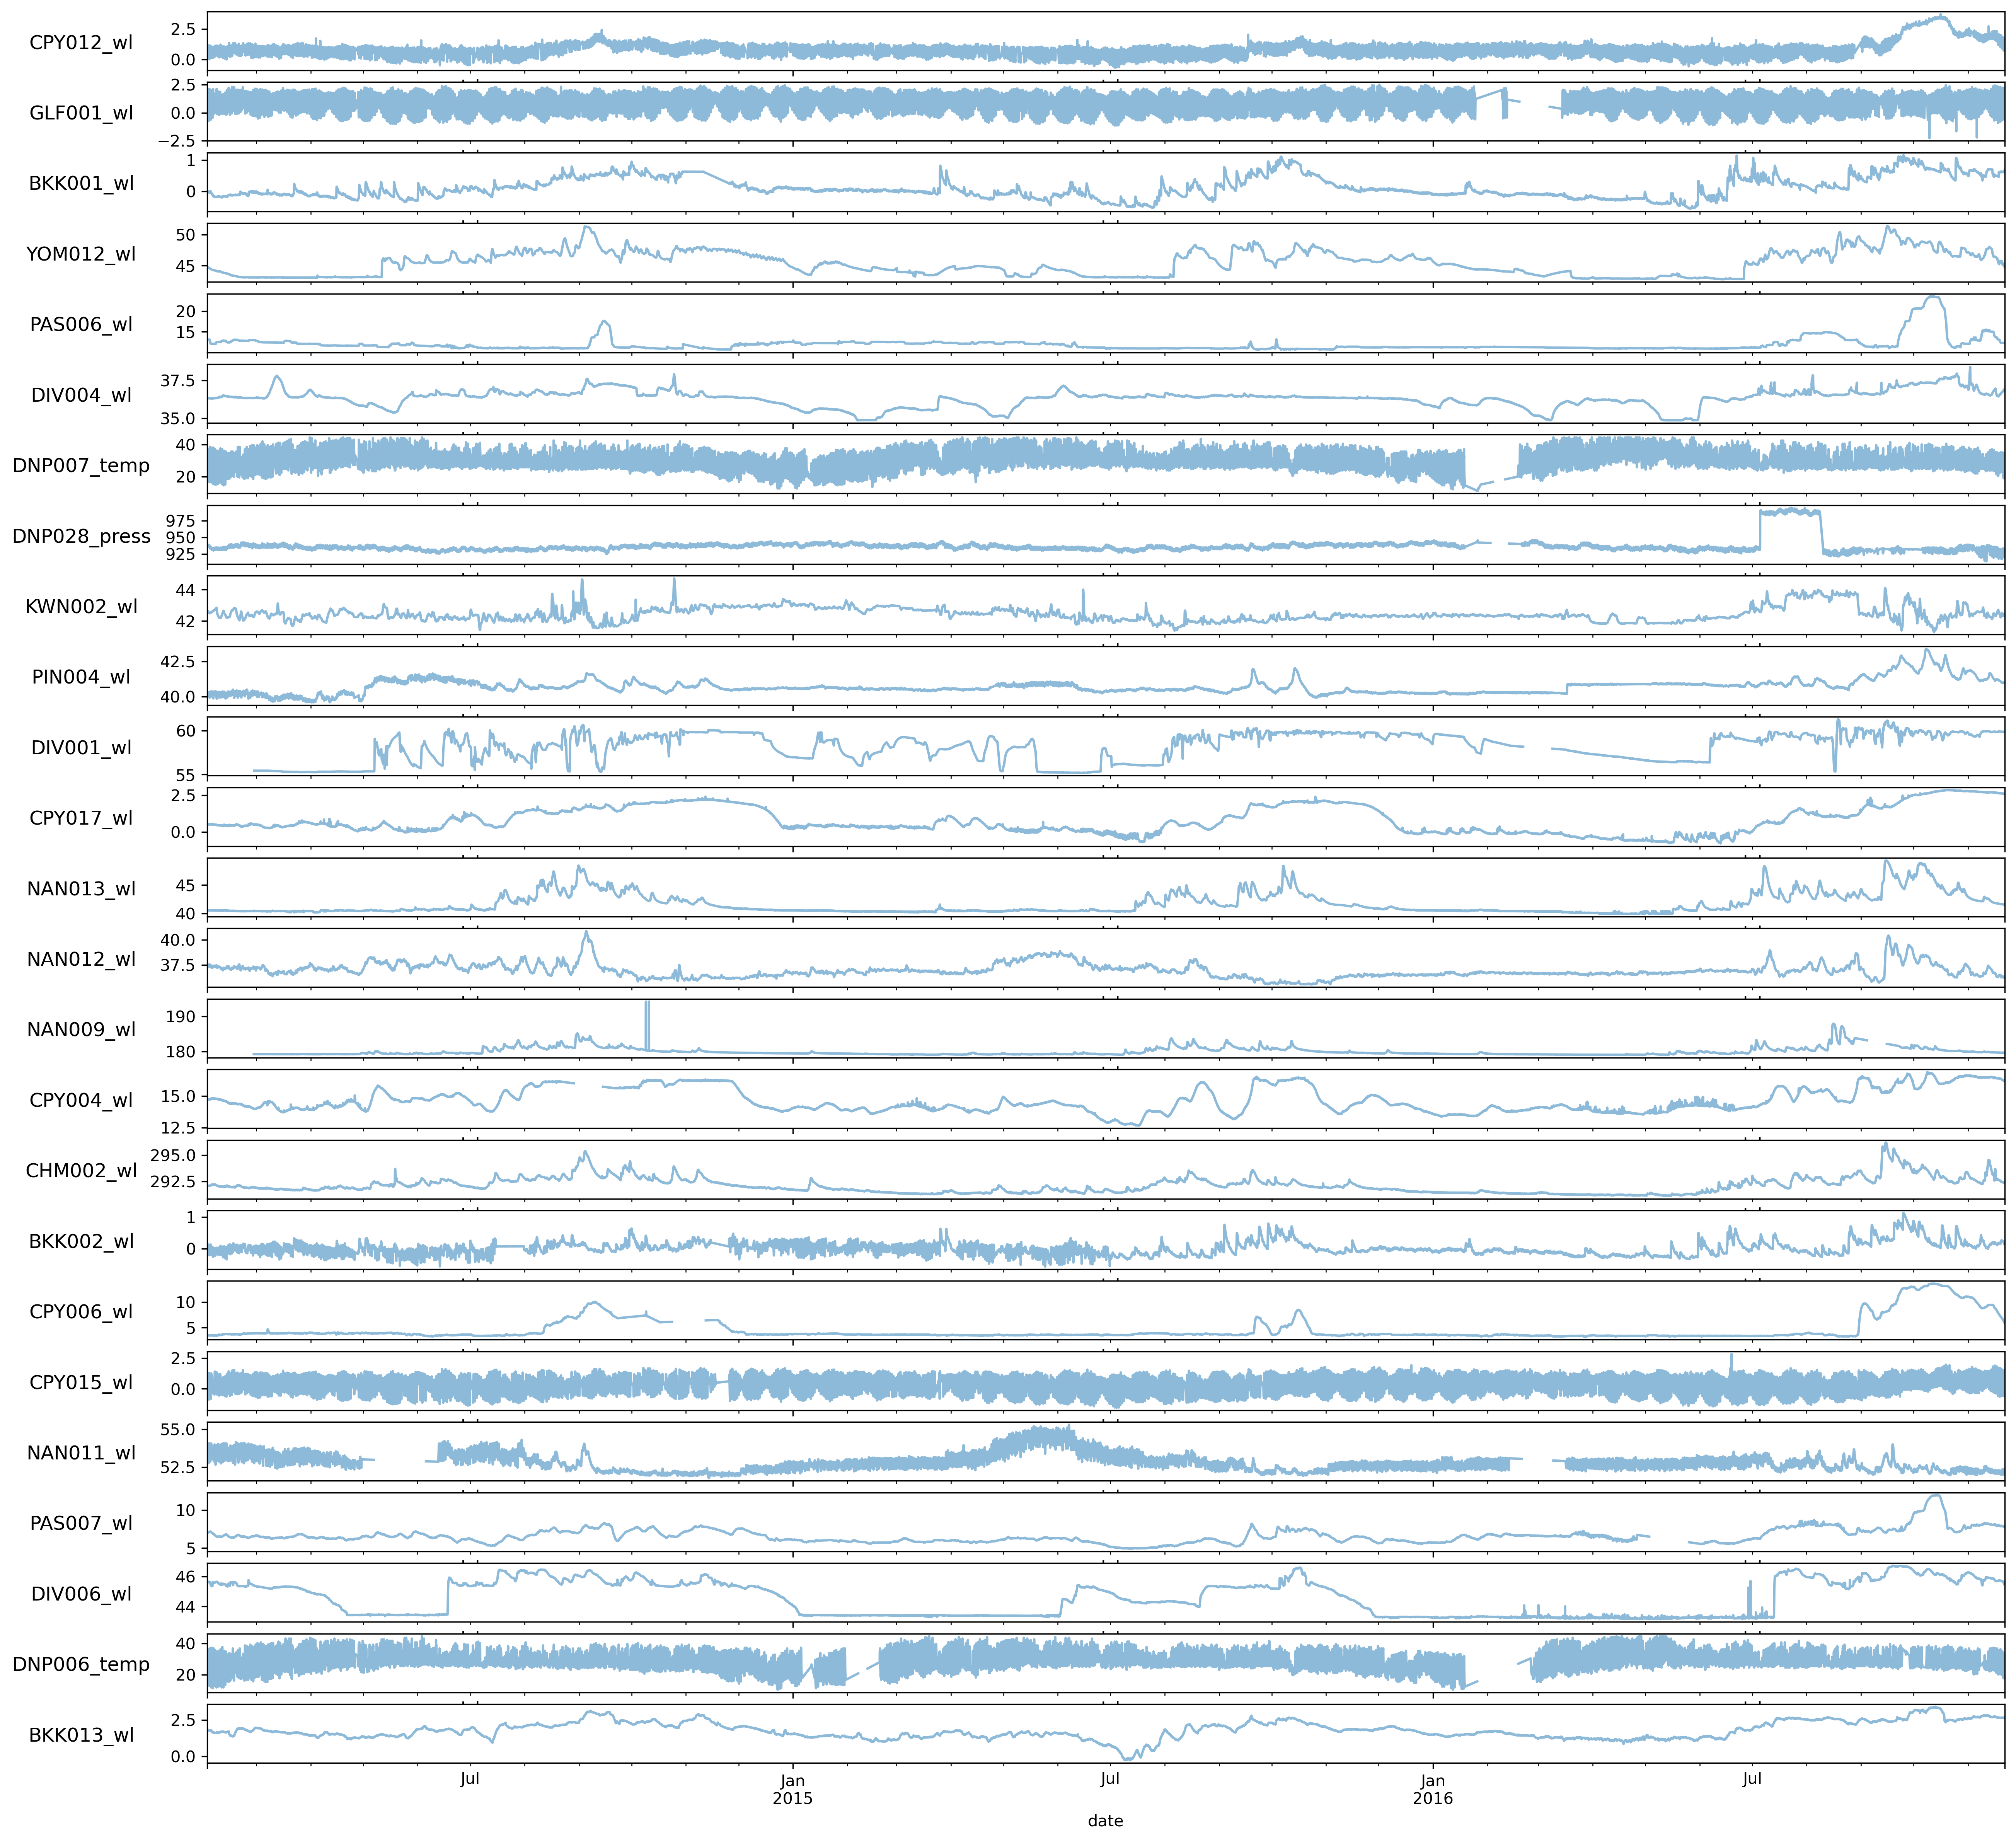

In [37]:
fig = plt.figure(figsize=(20, 20), dpi=300)

for num,col in enumerate(data.columns):

    ax = fig.add_subplot(data.shape[1],1,num+1)
    ax.set_title(col, x=-0.07,y=0.2, )#loc='right')
    # ax.set_title(col,fontsize=7)
    data[col].plot(ax=ax,legend=False,alpha=.5)
    
    # ax.legend(loc='upper left')
    # plt.tight_layout()

fig.savefig('mar02_data.png',dpi=300)

In [ ]:
water_st = pd.read_csv(f'/home/song/Public/Song/Work/Thesis/data/hii-telemetering-batch-data-master/station_metadata-water-level.csv')
ori = pd.read_csv('/home/song/Public/Song/Work/Thesis/data/instant_data/all/water.csv',parse_dates=['date'],index_col=['date'])
# edit = pd.read_csv('/home/song/Public/Song/Work/Thesis/data/instant_data/all/water_edit_notwork.csv',parse_dates=['date'],index_col=['date'])
inst = instant_data()
df = inst.hourly_instant()

In [4]:
col='CPY012_wl'

In [5]:
df.columns

Index(['BKK001_wl', 'BKK002_wl', 'BKK003_wl', 'BKK004_wl', 'BKK005_wl',
       'BKK007_wl', 'BKK008_wl', 'BKK013_wl', 'BKK018_wl', 'BKK019_wl',
       ...
       'YOM003_rain1h', 'YOM004_rain1h', 'YOM005_rain1h', 'YOM006_rain1h',
       'YOM007_rain1h', 'YOM008_rain1h', 'YOM009_rain1h', 'YOM010_rain1h',
       'YOM011_rain1h', 'YOM012_rain1h'],
      dtype='object', length=337)

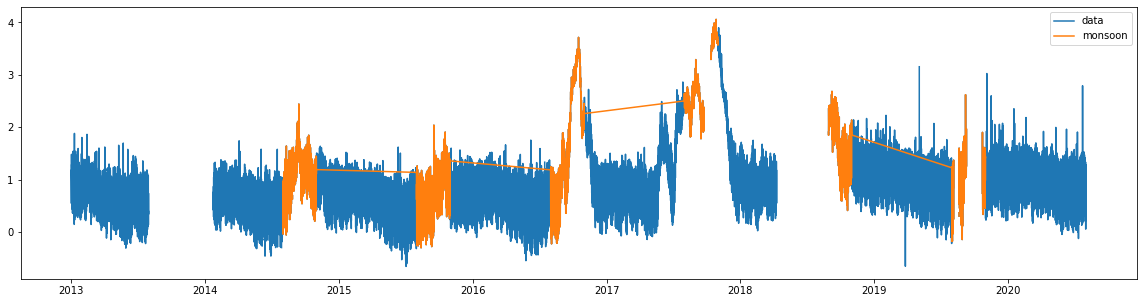

In [7]:
monsoon=[8,9,10]
plt.figure(figsize= (20,5))

# plt.plot(ori.resample('h').mean()[col]["2014":"2014"],label='ori')
plt.plot(df[col],label='data',)
plt.plot(df[col].iloc[(df.index.month.isin(monsoon))],label='monsoon',)
# plt.axhline(thr)
plt.legend()

# cutoff MAR output

In [13]:
day02 = call_mar(df,'CPY012_wl','day',cutoff=0.2)
day03 = call_mar(df,'CPY012_wl','day',cutoff=0.3)
day02

PAS009_wl  VLGE25_humid  CPY017_wl  DNP055_humid  \
date                                                                    
2013-01-01 00:00:00   1.210000           NaN        NaN           NaN   
2013-01-01 01:00:00   1.125000           NaN        NaN           NaN   
2013-01-01 02:00:00   1.033333           NaN        NaN           NaN   
2013-01-01 03:00:00   0.935000           NaN        NaN           NaN   
2013-01-01 04:00:00   0.828333           NaN        NaN           NaN   
...                        ...           ...        ...           ...   
2020-07-31 19:00:00   0.706667          71.0   0.653333           NaN   
2020-07-31 20:00:00   0.821667          75.0   0.460000           NaN   
2020-07-31 21:00:00   0.938000          78.9   0.450000           NaN   
2020-07-31 22:00:00   1.058000           NaN   0.536000           NaN   
2020-07-31 23:00:00   1.126667           NaN   0.465000           NaN   

                     NAN008_wl  DNP032_wl  YOM008_wl  DNP017_temp   CHM002_wl  \
date                                                                            
2013-01-01 00:00:00  19.970000        NaN     33.260          NaN  292.476000   
2013-01-01 01:00:00  19.970000        NaN     33.260          NaN  292.526667   
2013-01-01 02:00:00  19.970000        NaN     33.260          NaN  292.540000   
2013-01-01 03:00:00  19.971667        NaN     33.264          NaN  292.525000   
2013-01-01 04:00:00  19.970000        NaN     33.270          NaN  292.520000   
...                        ...        ...        ...          ...         ...   
2020-07-31 19:00:00  18.283333  81.600000     32.680        25.97  291.953333   
2020-07-31 20:00:00  18.280000  81.595000     32.680          NaN  291.936667   
2020-07-31 21:00:00  18.276667  81.600000     32.680        24.99  291.926667   
2020-07-31 22:00:00  18.270000  81.596667     32.680        24.99  291.915000   
2020-07-31 23:00:00  18.270000  81.593333     32.680        24.50  291.912500   

                     CPY011_wl  DNP017_press   CHM006_wl  DNP032_temp  \
date                                                                    
2013-01-01 00:00:00   1.128000           NaN         NaN          NaN   
2013-01-01 01:00:00   1.043333           NaN         NaN          NaN   
2013-01-01 02:00:00   0.968333           NaN         NaN          NaN   
2013-01-01 03:00:00   0.880000           NaN         NaN          NaN   
2013-01-01 04:00:00   0.790000           NaN         NaN          NaN   
...                        ...           ...         ...          ...   
2020-07-31 19:00:00   0.690000        938.88  273.378333        31.85   
2020-07-31 20:00:00   0.796667           NaN  273.306667        30.38   
2020-07-31 21:00:00   0.905000        939.97  273.278333        28.91   
2020-07-31 22:00:00   0.981667        941.05  273.258000        28.42   
2020-07-31 23:00:00   1.045000        941.05  273.230000        27.93   

                     VLGE15_press  YOM009_wl  CPY012_wl  
date                                                     
2013-01-01 00:00:00           NaN  26.440000   1.176000  
2013-01-01 01:00:00           NaN  26.440000   1.076667  
2013-01-01 02:00:00           NaN  26.440000   0.970000  
2013-01-01 03:00:00           NaN  26.441667   0.858333  
2013-01-01 04:00:00           NaN  26.450000   0.743333  
...                           ...        ...        ...  
2020-07-31 19:00:00         991.0  26.380000   0.928333  
2020-07-31 20:00:00         992.1  26.395000   1.046667  
2020-07-31 21:00:00         993.0  26.390000   1.167500  
2020-07-31 22:00:00           NaN  26.388333   1.233333  
2020-07-31 23:00:00         994.1  26.383333   1.276667  

[66456 rows x 16 columns]

In [ ]:
day02.to_csv('day_MAR02.csv')
day03.to_csv('day_MAR03.csv')

# Mar

In [7]:
from DLtools.evaluation_rec import record_list_result
from DLtools.Data import instant_data,station_sel
from DLtools.feature_sel import call_mar,hi_corr_select
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
# from keras.utils.vis_utils import plot_model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,LSTM,RepeatVector,TimeDistributed,Dropout,Conv1D,MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping


In [8]:

def move_column_inplace(df, col, pos):
    col = df.pop(col)
    df.insert(pos, col.name, col)
    return df
def split_series(series, n_past, n_future):
    # n_past ==> no of past observations
    # n_future ==> no of future observations 
    X, y = list(), list()
    for window_start in range(len(series)):
        past_end = window_start + n_past
        future_end = past_end + n_future
        if future_end > len(series):
            break
        # slicing the past and future parts of the window
        past, future = series[window_start:past_end, :], series[past_end:future_end, :]
        X.append(past)
        y.append(future)
    return np.array(X), np.array(y)
def split_xy(data,n_past,n_future):
    x,y = split_series(data.values,n_past,n_future)
    x = x.reshape((x.shape[0], x.shape[1],n_features))
    y = y[:,:,0]
    return x,y
###### SETTING AREA ################
loading = instant_data()
# df,mode = loading.hourly_instant(),'hour'
df,mode = loading.daily_instant(),'day'
if mode =='hour': n_past,n_future = 24*7,72
elif mode =='day': n_past,n_future = 60,30

st = 'CPY012'
target,start_p,stop_p,host_path=station_sel(st,mode)
save_path =host_path+'/DL/'
#######################################################


In [9]:
def build_cnn1d():
    global n_past,n_future,n_features
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_past, n_features)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dropout(0.3))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(n_future))
    model.compile(optimizer='adam', loss='mse')    
    model.summary()
    return model

In [19]:
df = df[start_p:stop_p]
data = df
# data = del_less_col(data,ratio=.85)
data['Day'] = data.index.dayofyear #add day
data = data.interpolate(limit=300000000,limit_direction='both').astype('float32')#interpolate neighbor first, for rest NA fill with mean() #.apply(lambda x: x.fillna(x.mean()),axis=0)
data = move_column_inplace(data,target,0)
n_features = len(data.columns)
# split_pt = int(data.shape[0]*.7)
# train,test = data.iloc[:split_pt,:],data.iloc[split_pt:,:]
split_date = '2017-01-01'
train,test = data[:split_date],data[split_date:]

X_train, y_train = split_xy(train,n_past,n_future)
X_test, y_test = split_xy(test,n_past,n_future)

In [18]:
print(train.shape,X_train.shape,y_train.shape)
print(test.shape,X_test.shape,y_test.shape)

(1064, 361) (975, 60, 361) (975, 30)
(456, 361) (367, 60, 361) (367, 30)


In [20]:
print(train.shape,X_train.shape,y_train.shape)
print(test.shape,X_test.shape,y_test.shape)

(1066, 361) (977, 60, 361) (977, 30)
(455, 361) (366, 60, 361) (366, 30)


0 date
2014-04-02    0.698406
2014-04-03    0.758056
2014-04-04    0.780417
2014-04-05    0.681806
2014-04-06    0.722986
                ...   
2016-11-29    1.193066
2016-11-30    0.959179
2016-12-01    0.804930
2016-12-02    0.960764
2016-12-03    1.071597
Freq: D, Length: 977, dtype: float32
1 date
2014-04-03    0.758056
2014-04-04    0.780417
2014-04-05    0.681806
2014-04-06    0.722986
2014-04-07    0.725417
                ...   
2016-11-30    0.959179
2016-12-01    0.804930
2016-12-02    0.960764
2016-12-03    1.071597
2016-12-04    1.042292
Freq: D, Length: 977, dtype: float32
2 date
2014-04-04    0.780417
2014-04-05    0.681806
2014-04-06    0.722986
2014-04-07    0.725417
2014-04-08    0.670486
                ...   
2016-12-01    0.804930
2016-12-02    0.960764
2016-12-03    1.071597
2016-12-04    1.042292
2016-12-05    0.977014
Freq: D, Length: 977, dtype: float32
3 date
2014-04-05    0.681806
2014-04-06    0.722986
2014-04-07    0.725417
2014-04-08    0.670486
2014-04-09

In [12]:
model=build_cnn1d()
verbose, epochs = 1, 3

history = model.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),batch_size=32,verbose=verbose)
#######################################
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 59, 64)            46272     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 29, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1856)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1856)              0         
_________________________________________________________________
dense (Dense)                (None, 50)                92850     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1530      
Total params: 140,652
Trainable params: 140,652
Non-trainable params: 0
__________________________________________________

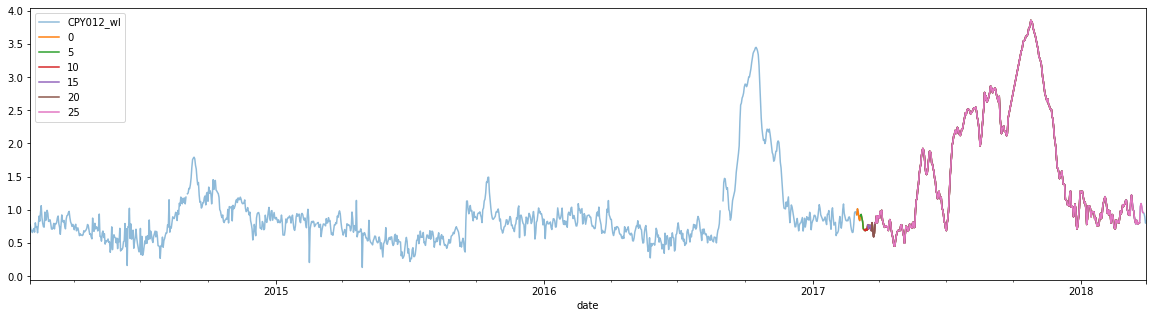

In [13]:
plt.figure(figsize=(20,5))
df[target].plot(alpha=0.5)
for i in range(0,n_future,5):
    st_idx =n_past+i
    end_idx =n_future+i
    # print(i, pd.Series(y_train[:,i],index=train.index[st_idx:len(y_train)+st_idx]))
    val = pd.Series(y_test[:,i],index=test.index[st_idx:len(y_test)+st_idx],name=i)
    val.plot()
# for i in range(n_future):
#     # test = pd.Series(testPredict[:,i],index=df.index[1:len(trainPredict)-1])
#     val = pd.Series(y_test[:,i],index=df.index[-len(y_test)+i:i],name=i)
#     val.plot()
#     if df[target].iloc[-len(val):].equals(val): print('equal')
#     else: print(df[target].iloc[-len(val):].shape,val.shape)
#     # test.plot()

plt.legend()


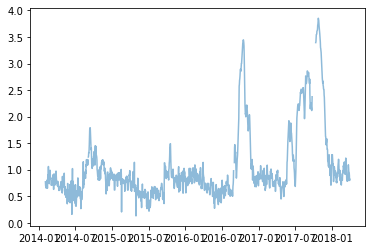

In [22]:
plt.plot(df[target],alpha=0.5)

In [14]:
for i in range(10):
    print(y_test[i,0],y_test)

0.92368054 [[0.92368054 1.0139623  0.9671528  ... 0.9086111  0.7991667  0.90923613]
 [1.0139623  0.9671528  0.8665278  ... 0.7991667  0.90923613 0.9053472 ]
 [0.9671528  0.8665278  0.8365972  ... 0.90923613 0.9053472  0.871875  ]
 ...
 [1.0477778  1.0691667  1.0914583  ... 0.9542361  0.94569445 0.8975694 ]
 [1.0691667  1.0914583  1.1370833  ... 0.94569445 0.8975694  0.7975    ]
 [1.0914583  1.1370833  1.1459723  ... 0.8975694  0.7975     0.82069445]]
1.0139623 [[0.92368054 1.0139623  0.9671528  ... 0.9086111  0.7991667  0.90923613]
 [1.0139623  0.9671528  0.8665278  ... 0.7991667  0.90923613 0.9053472 ]
 [0.9671528  0.8665278  0.8365972  ... 0.90923613 0.9053472  0.871875  ]
 ...
 [1.0477778  1.0691667  1.0914583  ... 0.9542361  0.94569445 0.8975694 ]
 [1.0691667  1.0914583  1.1370833  ... 0.94569445 0.8975694  0.7975    ]
 [1.0914583  1.1370833  1.1459723  ... 0.8975694  0.7975     0.82069445]]
0.9671528 [[0.92368054 1.0139623  0.9671528  ... 0.9086111  0.7991667  0.90923613]
 [1.0139